# Modelo CRISP - DM aplicado a un modelo predictivo de sepsis
Este notebook contiene la aplicación del modelo CRISP-DM para un problema de predicción de sepsis, desarrollado por el Health Tech Synergy Group, grupo que hace parte de la tercera cohorte del diplomado "Inteligencia artificial en salud" dictado por la Universidad de la Sabana.
Los integrantes del Health Tech Synergy Group son:
* Andrés Manuel Diaz Hung
* Daniela Jimenez
* Karen Borda
* Jorge Rivera
* Zulay Arenas
## Introducción
CRISP- DM es la abreviatura de Proceso Interindustrial para la Minería de datos, y representa un método probado y estandarizado para comprender el trabajo de la minería de datos.
El ciclo de vida del modelos CRISP tiene seis fases:
1. **Compresión del negocio:** Esta fase implica la comprensión de los objetivos y requisitos del proyecto desde la perspectiva comercial
2. **Comprensión de los datos:** Implica análisis de calidad, limpieza y preprocesamiento de los datos, así como la realización de un proceso de (EDA) para comprender los patrones y relaciones dentro de los datos.
3. **Preparación de los datos:** El objetivo de esta fase es la preparación de los datos para el modelado.
4. **Modelado:** En esta fase se aplican los algoritmos de minería de datos apropiados para los datos preparados. Entrenamiento y optimización de modelos.
5. **Evaluación:** Esta fase implica evaluar el modelo o los modelos seleccionados con base en unas métricas pre-establecidas, para corroborar si estos cumplen con su objetivo.
6. **Despliegue:** Esta fase final implica implementar el modelo de minería de datos en el entorno empresarial para generar resultados procesables. Incluye tareas como la integración del modelo con los sistemas existentes, la automatización del proceso de puntuación y el desarrollo de estrategias de monitoreo y mantenimiento. 

## Comprensión del negocio:
Nuestro problema aborda una serie de datos clínicos, para-clínicos y socio demográficos de pacientes que han desarrollado sepsis. Nuestro equipo "Health Tech Synergy" desarrolla predictivo para determinar la suceptibilidad de un individuo par desarrollar sepsis a partir de estos datos.

## Comprensión de los datos
Vamos a cargar la base de datos y empezaremos a realizar el análisis de nuestra base de datos.
### Carga de la base de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

filename = 'data/sepsis_ejemplo.csv'
df = pd.read_csv(filename)

Observaremos el encabezado de la base de datos

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,1353110,53,53,61.5,99.5,38.25,140.0,89.0,64.0,20.0,...,NaN,NaN,72.00,1,0.0,1.0,-84.73,54,0,117203
1,1259425,15,15,90.0,96.0,36.80,125.0,77.0,54.0,20.0,...,NaN,NaN,75.00,0,0.0,1.0,-25.44,16,0,115025
2,15353,18,18,78.0,97.0,NaN,121.0,86.0,76.0,21.0,...,NaN,NaN,68.63,1,0.0,1.0,-67.35,23,0,14692
3,223518,26,26,82.0,95.0,NaN,133.0,80.0,59.0,12.0,...,NaN,NaN,66.36,1,NaN,NaN,-0.02,31,0,16777
4,917766,23,23,84.0,96.0,NaN,151.0,130.0,115.0,26.0,...,NaN,NaN,55.00,0,0.0,1.0,-6.26,24,0,100738


In [3]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')


### Eliminación de columnas sin información

Después de utilizar a ChatGPT para lograr una descripción de las variables, se ha llegado a un consenso entre el equipo, y se eliminaran las siguientes variables:

**Unnamed 0.1 y Unnamed: 0:** Estas variables no tienen información acerca de que representan, y parece que hacen parte de una codificación propia del sistema.

**Hour:** Esta variable corresponde a la codificación de la hora de registro y no es relevante clínicamente.

**TroponinI:** Troponina 1, dado a que es marcador de daño cardíaco y no es relevante en nuestro estudio de sepsis.

In [4]:
# drop variables Unnamed 0.1 and Unnamed: 0
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Hour', 'TroponinI'], axis=1, inplace=True)
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,61.5,99.5,38.25,140.0,89.0,64.0,20.0,34.5,NaN,NaN,...,NaN,NaN,72.00,1,0.0,1.0,-84.73,54,0,117203
1,90.0,96.0,36.80,125.0,77.0,54.0,20.0,NaN,NaN,NaN,...,NaN,NaN,75.00,0,0.0,1.0,-25.44,16,0,115025
2,78.0,97.0,NaN,121.0,86.0,76.0,21.0,NaN,NaN,NaN,...,NaN,NaN,68.63,1,0.0,1.0,-67.35,23,0,14692
3,82.0,95.0,NaN,133.0,80.0,59.0,12.0,NaN,NaN,NaN,...,NaN,NaN,66.36,1,NaN,NaN,-0.02,31,0,16777
4,84.0,96.0,NaN,151.0,130.0,115.0,26.0,NaN,NaN,NaN,...,NaN,NaN,55.00,0,0.0,1.0,-6.26,24,0,100738


Las variables presentes en nuestro dataset son:

| **Variable**       | **Tipo**         | **Descripción**                                                                                                                                           |
|--------------------|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| HR                 | Clínica           | Frecuencia cardíaca del paciente (pulsaciones por minuto).                                                                                                |
| O2Sat              | Clínica           | Saturación de oxígeno en la sangre (%).                                                                                                                   |
| Temp               | Clínica           | Temperatura corporal (°C).                                                                                                                                |
| SBP                | Clínica           | Presión arterial sistólica (mmHg).                                                                                                                        |
| MAP                | Clínica           | Presión arterial media (mmHg).                                                                                                                            |
| DBP                | Clínica           | Presión arterial diastólica (mmHg).                                                                                                                       |
| Resp               | Clínica           | Frecuencia respiratoria (respiraciones por minuto).                                                                                                        |
| SepsisLabel        | Clínica           | Indicador de sepsis (0: No sepsis, 1: Sepsis).                                                                                                            |
| ICULOS             | Clínica           | Duración de la estancia en la unidad de cuidados intensivos (horas).                                                                                       |
| EtCO2              | Paraclínica       | Presión de dióxido de carbono al final de la espiración.                                                                                                   |
| BaseExcess         | Paraclínica       | Exceso de base en la sangre (medido en mEq/L).                                                                                                            |
| HCO3               | Paraclínica       | Bicarbonato en sangre (mEq/L).                                                                                                                            |
| FiO2               | Paraclínica       | Fracción inspirada de oxígeno (porcentaje).                                                                                                               |
| pH                 | Paraclínica       | pH sanguíneo.                                                                                                                                            |
| PaCO2              | Paraclínica       | Presión parcial de dióxido de carbono (mmHg).                                                                                                             |
| SaO2               | Paraclínica       | Saturación de oxígeno arterial (%).                                                                                                                       |
| AST                | Paraclínica       | Aspartato aminotransferasa, un marcador de daño hepático.                                                                                                 |
| BUN                | Paraclínica       | Nitrógeno ureico en sangre (mg/dL), indicador de función renal.                                                                                           |
| Alkalinephos       | Paraclínica       | Fosfatasa alcalina, un marcador de función hepática y ósea.                                                                                               |
| Calcium            | Paraclínica       | Nivel de calcio en la sangre (mg/dL).                                                                                                                     |
| Chloride           | Paraclínica       | Nivel de cloro en la sangre (mmol/L).                                                                                                                     |
| Creatinine         | Paraclínica       | Creatinina en sangre, indicador de la función renal (mg/dL).                                                                                              |
| Bilirubin_direct   | Paraclínica       | Bilirrubina directa (mg/dL).                                                                                                                              |
| Glucose            | Paraclínica       | Nivel de glucosa en sangre (mg/dL).                                                                                                                       |
| Lactate            | Paraclínica       | Nivel de lactato en sangre, indicador de hipoxia (mmol/L).                                                                                                |
| Magnesium          | Paraclínica       | Nivel de magnesio en sangre (mg/dL).                                                                                                                      |
| Phosphate          | Paraclínica       | Nivel de fosfato en sangre (mg/dL).                                                                                                                       |
| Potassium          | Paraclínica       | Nivel de potasio en sangre (mmol/L).                                                                                                                      |
| Bilirubin_total    | Paraclínica       | Bilirrubina total en sangre (mg/dL).                                                                                                                      |                     |
| Hct                | Paraclínica       | Hematocrito, proporción de glóbulos rojos en la sangre (%).                                                                                               |
| Hgb                | Paraclínica       | Hemoglobina en sangre (g/dL).                                                                                                                             |
| PTT                | Paraclínica       | Tiempo de tromboplastina parcial, evalúa la coagulación (segundos).                                                                                       |
| WBC                | Paraclínica       | Recuento de glóbulos blancos (10^9/L).                                                                                                                    |
| Fibrinogen         | Paraclínica       | Nivel de fibrinógeno en sangre (mg/dL), un factor de coagulación.                                                                                         |
| Platelets          | Paraclínica       | Conteo de plaquetas en sangre (10^9/L).                                                                                                                   |
| Age                | Sociodemográfica  | Edad del paciente (años).                                                                                                                                 |
| Gender             | Sociodemográfica  | Género del paciente (0: Mujer, 1: Hombre).                                                                                                                |
| Unit1              | Sociodemográfica  | Unidad en la que se encuentra el paciente (0: No es unidad 1, 1: Es unidad 1).                                                                            |
| Unit2              | Sociodemográfica  | Segunda unidad en la que se encuentra el paciente (0: No es unidad 2, 1: Es unidad 2).                                                                    |
| HospAdmTime        | Sociodemográfica  | Tiempo desde la admisión hospitalaria hasta el inicio del registro (horas).                                                                                |
| Patient_ID         | Sociodemográfica  | Identificación única del paciente.                                                                                                                        |


Ahora vamos a obtener mas información de nuestra base de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15522 entries, 0 to 15521
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                13933 non-null  float64
 1   O2Sat             13479 non-null  float64
 2   Temp              5204 non-null   float64
 3   SBP               13204 non-null  float64
 4   MAP               13522 non-null  float64
 5   DBP               10628 non-null  float64
 6   Resp              13048 non-null  float64
 7   EtCO2             570 non-null    float64
 8   BaseExcess        779 non-null    float64
 9   HCO3              643 non-null    float64
 10  FiO2              1232 non-null   float64
 11  pH                1001 non-null   float64
 12  PaCO2             821 non-null    float64
 13  SaO2              528 non-null    float64
 14  AST               261 non-null    float64
 15  BUN               1046 non-null   float64
 16  Alkalinephos      263 non-null    float6

Ahora verificaremos algunas estadísticas descriptivas para la base de datos

In [6]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,13933.000000,13479.000000,5204.000000,13204.000000,13522.000000,10628.000000,13048.000000,570.000000,779.000000,643.000000,...,108.000000,931.000000,15522.000000,15522.000000,9418.000000,9418.000000,15522.000000,15522.000000,15522.000000,15522.000000
mean,84.571916,97.160732,36.965436,123.532055,82.136896,63.604582,18.746417,32.679825,-0.728370,24.345257,...,289.722222,191.363588,61.987202,0.558949,0.496178,0.503822,-55.780407,26.870378,0.017781,59807.965533
std,17.398287,2.978057,0.770606,23.349641,16.558597,14.262691,5.159581,8.288760,4.694719,4.330079,...,156.084439,97.330140,16.365492,0.496529,0.500012,0.500012,163.009917,28.860795,0.132160,50286.653500
min,31.000000,20.000000,31.900000,39.000000,21.000000,20.000000,1.000000,10.000000,-20.000000,7.000000,...,52.000000,8.000000,15.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000,9.000000
25%,72.000000,96.000000,36.500000,106.250000,71.000000,54.000000,15.500000,28.000000,-3.000000,22.000000,...,191.500000,123.500000,52.000000,0.000000,0.000000,0.000000,-45.772500,11.000000,0.000000,10241.000000
50%,83.000000,98.000000,37.000000,121.000000,80.000000,62.000000,18.000000,33.000000,0.000000,24.000000,...,258.500000,180.000000,64.000000,1.000000,0.000000,1.000000,-6.120000,21.000000,0.000000,20493.500000
75%,95.000000,99.500000,37.440000,138.000000,91.670000,72.000000,21.000000,38.000000,1.000000,27.000000,...,322.750000,237.500000,74.000000,1.000000,1.000000,1.000000,-0.040000,34.000000,0.000000,110087.000000
max,181.000000,100.000000,42.220000,296.000000,296.000000,296.000000,99.000000,79.000000,49.500000,45.000000,...,816.000000,902.000000,100.000000,1.000000,1.000000,1.000000,22.040000,330.000000,1.000000,119992.000000


Por inspección del anterior cuadro se puede observar que existen valores faltantes, y también existen valores anómalos, por lo tanto se iniciará el proceso de limpieza de la base de datos.

**Creamos una lista con el porcentaje de valores faltantes en nuestro dataset** 

In [7]:
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
print(missing)

Bilirubin_direct    99.768071
Fibrinogen          99.304213
Bilirubin_total     98.363613
AST                 98.318516
Alkalinephos        98.305631
Lactate             97.423012
PTT                 97.055792
SaO2                96.598376
EtCO2               96.327793
Phosphate           96.018554
HCO3                95.857493
Chloride            95.490272
BaseExcess          94.981317
PaCO2               94.710733
Calcium             94.060044
Creatinine          94.002062
Platelets           94.002062
Magnesium           93.892540
WBC                 93.602629
pH                  93.551089
BUN                 93.261178
Hgb                 92.571834
FiO2                92.062878
Hct                 91.457286
Potassium           90.858137
Glucose             82.998325
Temp                66.473393
Unit1               39.324829
Unit2               39.324829
DBP                 31.529442
Resp                15.938668
SBP                 14.933643
O2Sat               13.161964
MAP       

Con base en la anterior tabla se nota que una gran proporción de variables, posee un porcentaje alto de errores. La metodología CRISP-DM brinda estos criterios:

*   Menos del 5% de datos faltantes se considera aceptable y generalmente se puede manejar con imputación simple.
*	Entre el 5% y el 30% puede requerir técnicas más sofisticadas, como imputación avanzada (e.g., KNN Imputation) o modelos específicos.

*	Más del 30% de datos faltantes en variables clave suele indicar un problema significativo y, en muchos casos, se recomienda descartar la variable o diseñar una estrategia específica para recuperar la información.

Hemos decidido hacer una análisis de las densidades de probabilidad para determinar si las variables presentan algun variación de la distribución estadística, entre pacientes con y sin sepsis
### Estimación de las densidades de probabilidad
Con el fin de lograr escoger variables que tengan capacidad predictora, y así poder plantear mejores hipótesis, realizaremos la estimación de las densidades de probabilidad para los diferentes tipos de variables de nuestra base de datos.

**Estimación de densidad para las variables clínicas**

In [8]:
# Variable a predecir
y = df["SepsisLabel"]
# Conjunto de variables predictoras
X = df.drop("SepsisLabel", axis=1)

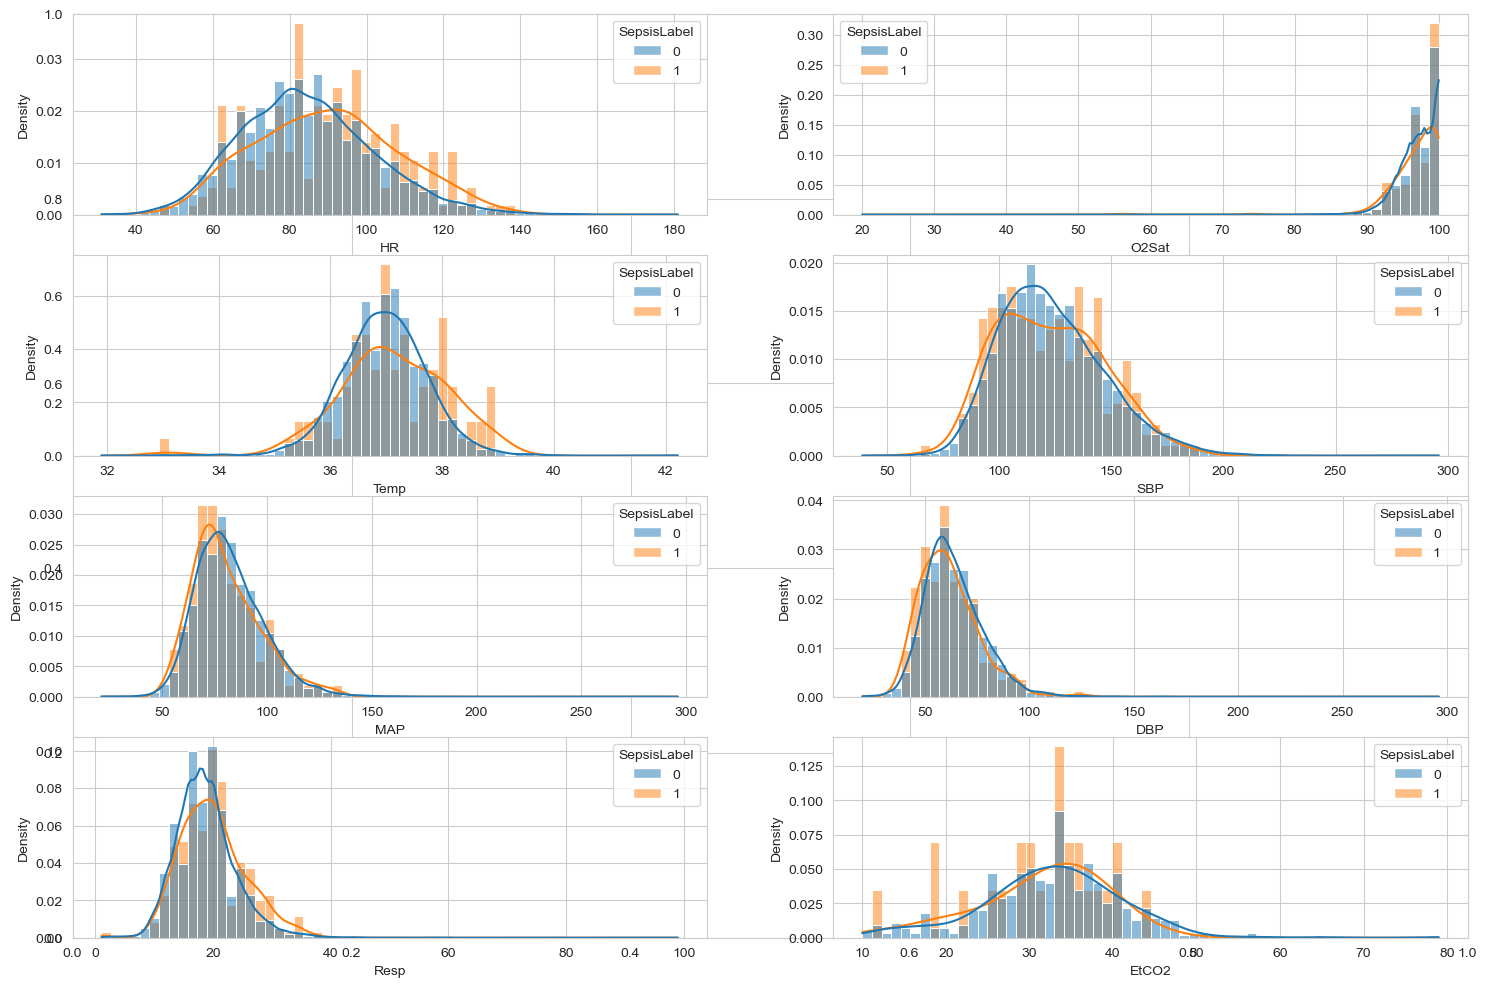

In [9]:
from sklearn.model_selection import train_test_split # data splitting into train and test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

signos_vitales = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize=(18,12))
#plt.subplots_adjust(hspace = .3)
plt.subplot(1,1,1)

#sns.histplot(data=X_train, x="HR", hue=y_train, stat="density", common_norm=False, bins=10, kde=True)

for i, column in enumerate(signos_vitales, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

Por observación de las distribuciones de probabilidad para pacientes con sepsis y sin sepsis varían para las siguientes variables: 

| **Variable** | **Descripción**                   |
|--------------|-----------------------------------|
| **HR:**      | Frecuencia cardíaca               |
| **Temp:**    | Temperatura corporal              |
| **SBP:**     | Presión sanguínea sistólica       |
| **MAP:**     | Presión sanguínea media           |
| **DBP:**     | Presión sanguínea diastólica      |
| **Resp:**    | Frecuencia respiratoria           |

**Estimación de la densidad de probabilidad para las variables paraclínicas**


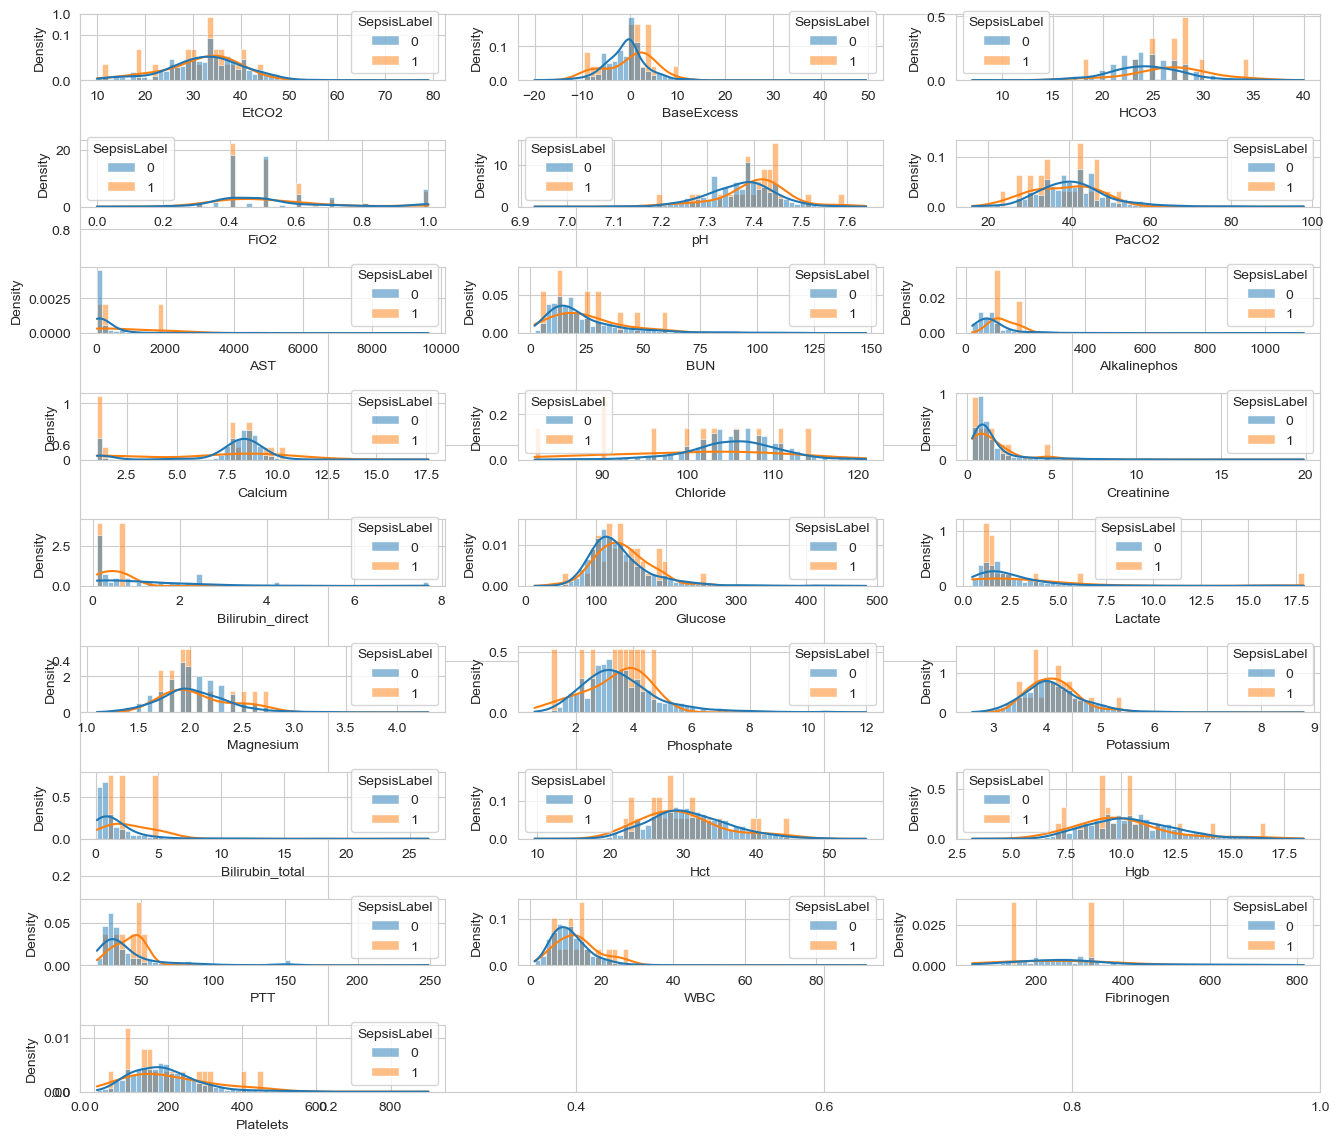

In [10]:
paraclinicas = ["EtCO2", "BaseExcess", "HCO3", "FiO2", "pH",
       "PaCO2", "AST", "BUN", "Alkalinephos", "Calcium", "Chloride",
       "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", "Magnesium",
       "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb",
       "PTT", "WBC", "Fibrinogen", "Platelets"]

plt.figure(figsize=(16,14))
plt.subplots_adjust(hspace = .9)
plt.subplot(1,1,1)

#sns.histplot(data=X_train, x="HR", hue=y_train, stat="density", common_norm=False, bins=10, kde=True)

for i, column in enumerate(paraclinicas, 1):
    plt.subplot(9,3,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

Tras una observación de las gráficas nos damos cuenta que las siguientes variables presentaban una variación en la distribución para los pacientes con y sin sepsis:
|---------------|------------------------------|
| **Variable**  | **Descripción**              |
| BaseExcess    | Exceso de base en la sangre  |
|  


**Estimación de las variables sociodemográficas**

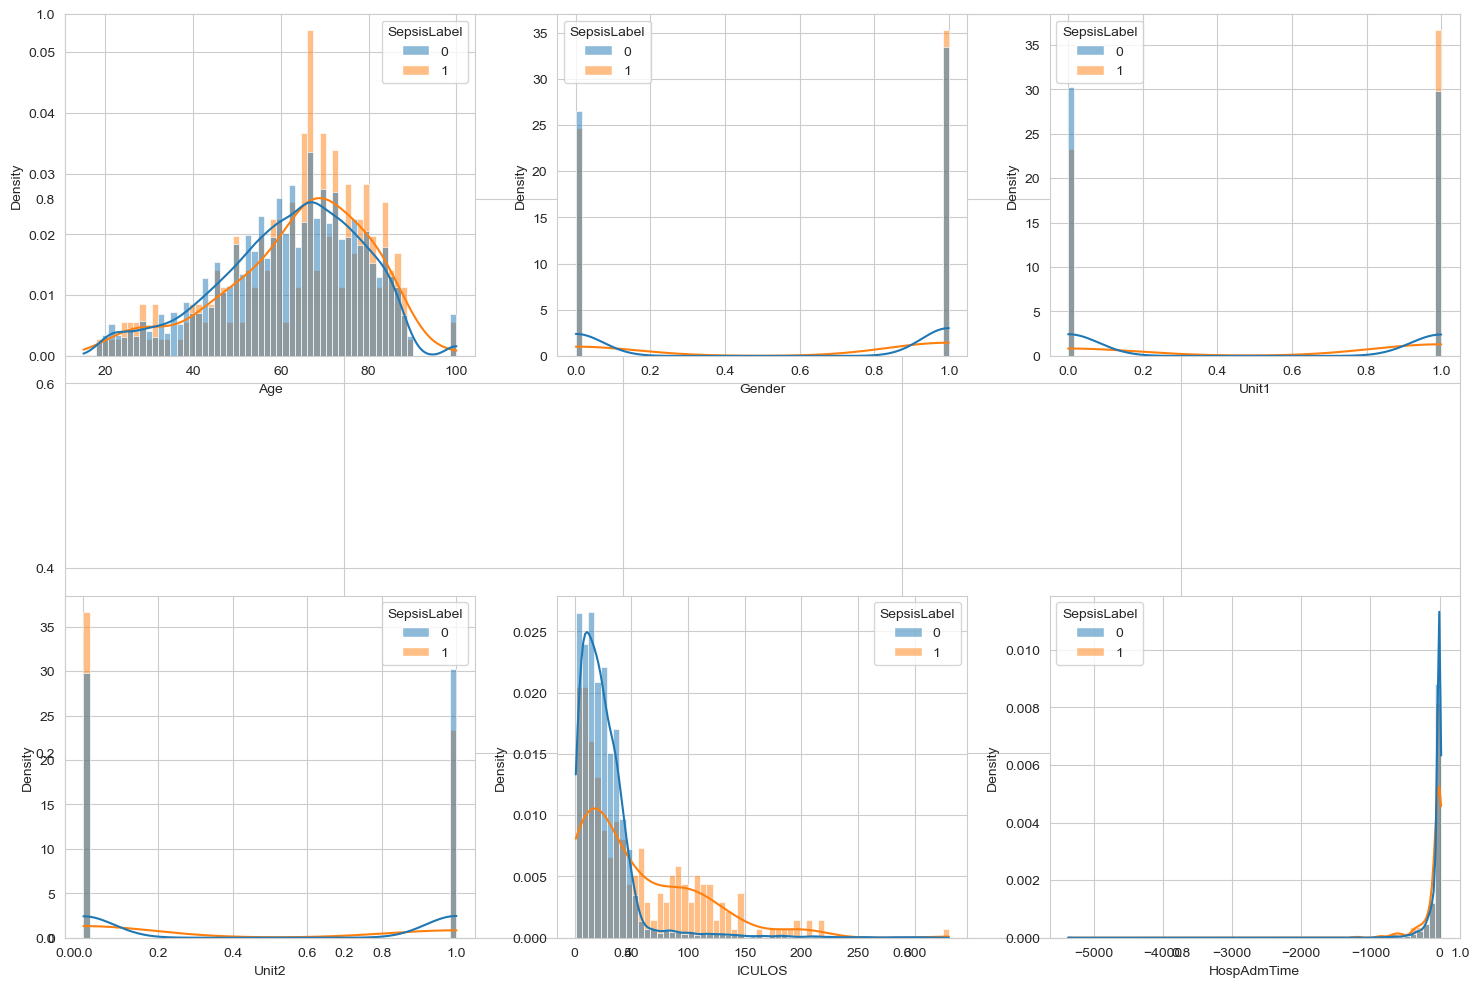

In [12]:
demograficas = ["Age", "Gender", "Unit1",
       "Unit2", "ICULOS", "HospAdmTime"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .7)
plt.subplot(1,1,1)

#sns.histplot(data=X_train, x="Age", hue=y_train, stat="density", common_norm=False, bins=10, kde=True)

for i, column in enumerate(demograficas, 1):
    plt.subplot(2,3,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)